# Simulating the power of the t-test in R

## Getting started

This note notebook simulates T-statistcs

$$
T = \frac{\hat{\beta}_1 - \beta_{1,0}}{SE(\hat{\beta}_1)}
$$

where $\beta_1$ and $SE(\hat{\beta}_1)$ are estimated from the model

$$
\texttt{income} = \beta_0 + \beta_1 \texttt{cost} + U.
$$

 
For each simulation run, the code draws random observations $(\texttt{cost}_i, U_i)$ for $i = 1, \ldots, n$ and computes the outcome $\texttt{income}_i$ according to the linear model above. Then, it estimates $\hat{\beta}_1$ and its standard error $SE(\hat{\beta}_1)$ based on the simulated sample. 

In this notebook, you can specify the true value of $\beta_1$, the hypothesized value $\beta_{1,0}$, and the sample size $n$, and see how the distribution of the T-statistic changes. These parameters do not fully specify the data-generating process - the missing ingredient is the joint distribution of $(\texttt{cost}, U)$. I have specified a distribution such that $\texttt{cost}$ is exogenous.

Do run the simulations, we need some helper functions that we load now:

In [82]:
source("helper_functions/helper_simulations.R")

This exposes the functions `simulate()` and `plot_simulation_results()` that we will use below. 

At this point, you can run all code in this notebook by clicking on the "Run All" button in the toolbar above. Everytime you make a change, you have to re-run the notebook to see the updated results.

## A first simulation

We start with a first simulation, and simulate a few samples under the null hypothesis. Under the null, we have $\beta_1 = \beta_{1,0}$. For simplicity, we set both to zero. We also set the sample size to $n=20$.


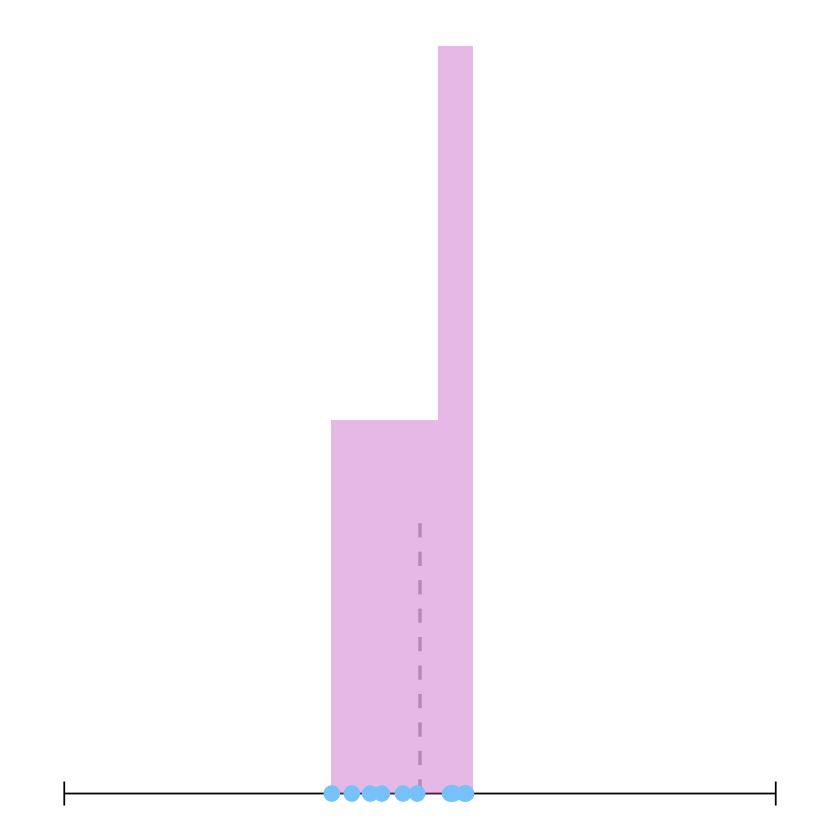

In [83]:
tstats <- simulate(
    num_simulations = 10, 
    true_beta1 = 0, 
    tested_beta1 = 0, 
    sample_size = 20
)

plot_simulation_results(tstats, point_per_observation = TRUE)

Every blue point represents a t-statistic, computed from one of our ten simulated samples. The histogram summarizes the distribution of the t-statistics. This simulation does not tell us much about the distribution of the t-statistic, every simulation draw is random and since we have only few draws, the observed distribution reflects simulation noise as much as the true distribution of the t-statistic. You can confirm this by re-running the simulation a few times by clicking the "Run All" button again and again: you will see that the blue points and the histogram change a lot from run to run.

When we increase the number of simulations, this problem goes away and we get a clearer picture of the distribution of the t-statistic under the null hypothesis.

Play around with the number of simulations. Try values like 100, 1,000, or 2,000 (enter them without the commas). You should observe that the simulated distribution of the t-statistic stabilizes, that is, it does not change much when you re-run the simulation. 

In theory, we know that the distribution should be approximately standard normal under the null hypothesis. To evaluate whether this happens in practice, we overlay the histogram with the standard normal density.

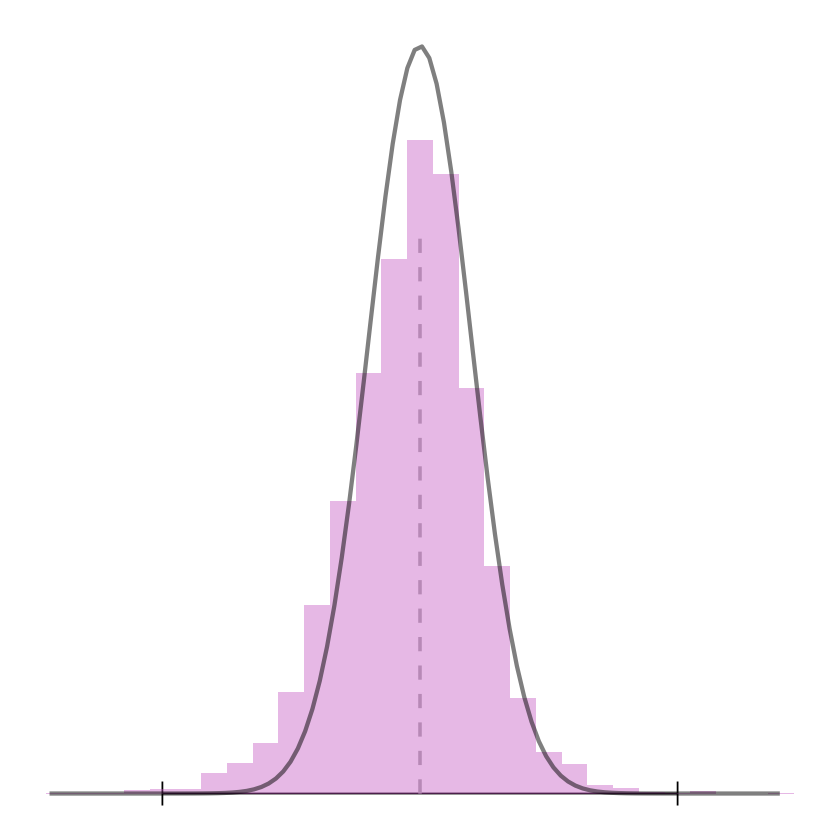

In [84]:
simulated_tstats <- simulate(
  num_simulations = 5000,
  true_beta1 = 0,
  tested_beta1 = 0,
  sample_size = 20
)

plot_simulation_results(simulated_tstats) +
  stat_function(fun = dnorm, color = "black", alpha = 0.5, size = 1.2)

As you can see, the standard normal density does not fit the simulated distribution perfectly. This is not surprising, the standard normal distribution approximation only holds exactly in large samples. Here, our sample is only of size $n=20$, which is quite small. In particular, you should see that the simulated distribution has slightly heavier tails than the standard normal distribution. That means that there is more probability mass allocated to extreme values of the t-statistic, and less mass in the center of the distribution.

Increase the sample size to confirm that the normal approximation works better in larger samples. Try values like 100, 500, 1,000 or even 5,000.